# The Garden of Forking Data (2:20?)

> https://youtu.be/R1vcdhPBlXA



In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.patches as patches


## Globe example (finite possibilities)

Here we approximate a globe by a four-sided die. This gives five possibilities of proportions between water (W) and land (L):
- 0 water, 4 land
- 1 water, 3 land
- 2 water, 2 land
- 3 water, 1 land
- 4 water, 0 land


In [42]:
def sim_globe(p=0.7, n=9):
    return np.random.choice(['W', 'L'], p=[p, 1-p], size=n)

print(sim_globe(p=1))
print(sum(sim_globe(p=0.5, n=int(1e4)) == 'W') / 1e4)

['W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W']
0.4968


Sample: ['L' 'L' 'W' 'W' 'L' 'W' 'W' 'W' 'W']


,poss,ways,post
0,0.00,0.0,0.000000
1,0.25,27.0,0.021293
2,0.50,512.0,0.403785
3,0.75,729.0,0.574921
4,1.00,0.0,0.000000


<Axes: xlabel='poss', ylabel='post'>

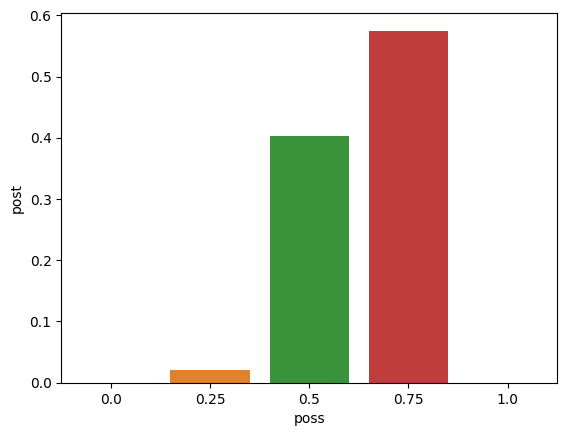

In [12]:
def compute_posterior(sample, world_size=4, poss=[0,0.25, 0.5, 0.75, 1.0]):
    W = sum(sample == 'W')
    L = sum(sample == 'L')
    f = lambda q: (world_size*q)**W * (world_size*(1-q))**L
    ways = np.array(list(map(f, poss, )))
    post = ways/ways.sum()
    return pd.DataFrame({'poss': poss, 'ways': ways, 'post': post})

sample = sim_globe()
df = compute_posterior(sim_globe())
print('Sample:', sample)
display(df)
sns.barplot(df, x='poss', y='post')


## Globe example (infinite possibilities)

The example for a spherical globe is almost exactly the same, since we don't care how many faces are on the surface, just what the proportion between water and land is.

The posterior destribution is the [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution), with shape parameters W and L.

74 26


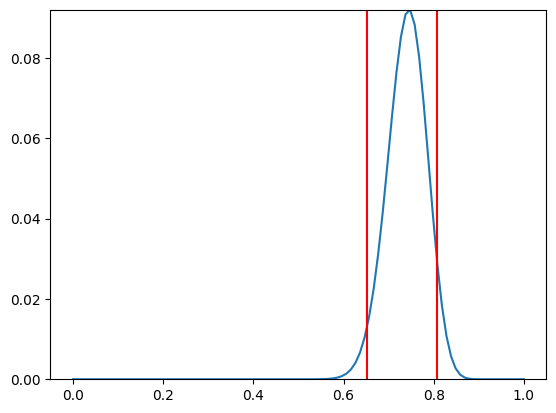

In [61]:
sample = sim_globe(p=0.7, n=100)
W = (sample == 'W').sum()
L = (sample == 'L').sum()
print(W,L)


X = np.linspace(0,1,100)
Y = stats.beta.pdf(X, W, L)
Y = Y/Y.sum()
sns.lineplot(x=X, y=Y)

# lower and upper bound for 95%
interval = 0.89
lower_p = (1-interval)/2
upper_p = 1-lower_p
lb = stats.beta.ppf(lower_p/2, W, L)
ub = LB = stats.beta.ppf(upper_p, W, L)
plt.axvline(lb, 0, 1, color='red')
plt.axvline(ub, 0, 1, color='red')
plt.ylim((0 ,Y.max()))
plt.show()